# Linear Perceptron

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/")

In [4]:
import numpy as np
import glob
from helperP import *

### Define linear perceptron class

In [6]:
class PrimalPerceptron(object):
	def __init__(self, x, y, w = None, b = None):
		num_sample, num_dims = x.shape

		np.random.seed(0)
		w = np.random.randn(num_dims, 1)
		b = np.random.randn(1, 1)
		self.x, self.y, self.w, self.b = x, y, w, b
		self.lr = 0.1
		
	def predict(self):
		preds = np.dot(self.x,self.w)+ self.b 
		preds=np.mean(preds,axis=1)
		y_hat = np.where(preds > 0, 1, -1)
		y_hat=y_hat.reshape(-1,1)
		return preds, y_hat

	def update(self):	
		# update the weights and bias
		predict,y_pred=self.predict()
		y_update= np.where((self.y!=y_pred), self.y, 0)
		dw= np.multiply(y_update,self.x)
		db= y_update
		dw=np.mean(dw, axis=0).reshape(self.x.shape[1],1)
		db=np.mean(dw, axis=0).reshape(1,1)
		self.w=self.w+np.multiply(dw,self.lr)
		self.b=self.b+np.multiply(db,self.lr)
		return

### Train linear perceptron

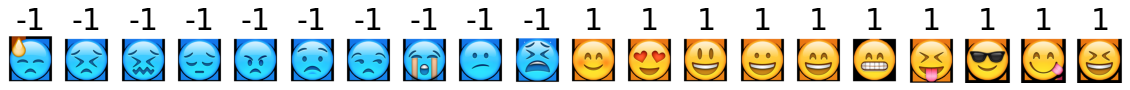

In [8]:
if __name__ == '__main__':
    # Load data
    file_names = glob.glob('DATASET/data_emoji/*/*.*')
    reduced, images, labels = load_image(file_names)
    
    reduced = reduced.reshape(reduced.shape[0], -1)
    # Instantiate Perceptron
    p = PrimalPerceptron(reduced, labels)
    # Iterate over data and update
    
    plt.rcParams["figure.figsize"] = [20, 20]  
    for i in range(100): 
        p.update()
        preds, y_hat = p.predict()
    visualize_results(images, preds, labels, None)
